# Preprocess pm25 data

In [37]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime

In [43]:
def parser(x, y):
    return datetime.strptime(x + y, '%Y%m%d%H')

df = pd.read_csv('data/beijing_20160101-20161231/beijing_all_20160101.csv', parse_dates={'Timestamp':['date', 'hour']}, index_col=0, date_parser=parser)

In [155]:
df.head()

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-03-26,PM2.5,14.0,12.0,8.0,13.0,15.0,11.0,12.0,13.0,8.0,...,9.0,22.0,18.0,22.0,11.0,5.0,14.0,11.0,16.0,13.0
2017-03-26,PM2.5_24h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-26,PM10,30.0,24.0,16.0,13.0,20.0,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,15.0,17.0,18.0,26.0
2017-03-26,PM10_24h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-26,AQI,30.0,24.0,19.0,19.0,22.0,28.0,23.0,22.0,24.0,...,25.0,31.0,26.0,31.0,20.0,22.0,20.0,21.0,23.0,26.0


In [45]:
pm25 = df.loc[df['type'] == 'PM2.5']

In [154]:
pm25.head()

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-03-26 00:00:00,PM2.5,14.0,12.0,8.0,13.0,15.0,11.0,12.0,13.0,8.0,...,9.0,22.0,18.0,22.0,11.0,5.0,14.0,11.0,16.0,13.0
2017-03-26 01:00:00,PM2.5,15.0,10.0,8.0,13.0,16.0,12.0,13.0,14.0,17.0,...,7.0,15.0,8.0,25.0,11.0,19.0,13.0,12.0,NaN,13.0
2017-03-26 02:00:00,PM2.5,11.0,8.0,9.0,9.0,12.0,10.0,11.0,20.0,3.0,...,4.0,12.0,10.0,24.0,5.0,13.0,15.0,13.0,6.0,10.0
2017-03-26 03:00:00,PM2.5,13.0,11.0,11.0,11.0,11.0,12.0,9.0,15.0,11.0,...,6.0,11.0,8.0,24.0,9.0,9.0,12.0,10.0,14.0,10.0
2017-03-26 04:00:00,PM2.5,6.0,12.0,11.0,12.0,7.0,11.0,11.0,9.0,9.0,...,4.0,10.0,11.0,22.0,16.0,15.0,10.0,12.0,16.0,10.0


In [ ]:
path1 = 'data/beijing_20160101-20161231/'
path2 = 'data/beijing_20170101-20171231/'
allfiles = glob.glob(path1 + 'beijing_all*.csv') + glob.glob(path2 + 'beijing_all*.csv')
df_list = []
data = pd.DataFrame()
for file in allfiles:
    try:
        df = pd.read_csv(file, parse_dates={'Timestamp':['date', 'hour']}, index_col = 0, date_parser=parser)
        pm25 = df.loc[df['type'] == 'PM2.5']
        df_list.append(pm25['东四'])
    except (pd.errors.EmptyDataError, ValueError) as e:
        print(e)
data = pd.concat(df_list)

In [ ]:
pd.read_csv('pm25.csv', parse_dates=True, index_col=0, header=None)

# Preprocess nc file

In [18]:
from netCDF4 import Dataset, num2date

In [4]:
nc_data = Dataset("test.nc", "r", format="NETCDF4")

In [8]:
nc_data.variables['longitude'][:]

array([115.   , 115.125, 115.25 , 115.375, 115.5  , 115.625, 115.75 ,
       115.875, 116.   , 116.125, 116.25 , 116.375, 116.5  , 116.625,
       116.75 , 116.875, 117.   ], dtype=float32)

In [12]:
nc_data.variables['time'][:]

array([1016832, 1016838, 1016844, ..., 1034358, 1034364, 1034370],
      dtype=int32)

In [17]:
print(nc_data.variables['time'].units)

hours since 1900-01-01 00:00:0.0


In [35]:
times = num2date(nc_data.variables['time'][:], nc_data.variables['time'].units)

In [21]:
print(nc_data.variables['t2m'].dimensions)

('time', 'latitude', 'longitude')


In [22]:
nc_data.variables['t2m'][:].shape

(2924, 17, 17)

In [27]:
nc_data.variables['longitude'][:][11]

116.375

In [33]:
nc_data.variables['latitude'][:][9]

39.875

In [34]:
nc_data.variables['t2m'][:, 9, 11]

array([266.15869676, 277.57201342, 271.10950286, ..., 277.34280944,
       270.39063581, 266.95570153])

In [38]:
t2m = pd.Series(nc_data.variables['t2m'][:, 9, 11], index=times)

In [ ]:
t2m.shift(8, freq = 'H')

In [77]:
pm25_data = pd.read_csv('pm25.csv', parse_dates=True, index_col=0, header=None)

t2m = pd.Series(nc_data.variables['t2m'][:, 9, 11], index=times)
# shift time zone
t2m = t2m.shift(8, freq='H')
d2m = pd.Series(nc_data.variables['d2m'][:, 9, 11], index=times)
d2m = d2m.shift(8, freq='H')
u10 = pd.Series(nc_data.variables['u10'][:, 9, 11], index=times)
u10 = u10.shift(8, freq='H')
v10 = pd.Series(nc_data.variables['v10'][:, 9, 11], index=times)
v10 = v10.shift(8, freq='H')
# concatenate all the series
raw_data = pd.concat([pm25_data, t2m, d2m, u10, v10], axis=1).dropna()

In [ ]:
# rename columns
raw_data.columns = ['pm25', 't2m', 'd2m', 'u10', 'v10']
raw_data.head()

# LSTM 

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [85]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [198]:
values = raw_data.values
# ensure all data is float
values = values.astype('float32')
# normalize features (2668, 5)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 3
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, lag_hours, predict_hours)
reframed.head()

,var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),...,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var1(t+2),var2(t+2),var3(t+2),var4(t+2),var5(t+2)
8,0.153046,0.198574,0.374091,0.558573,0.512661,0.251114,0.406248,0.425272,0.554446,0.568088,...,0.172363,0.382836,0.424458,0.520143,0.496511,0.350669,0.294288,0.428579,0.522122,0.540633
9,0.251114,0.406248,0.425272,0.554446,0.568088,0.381872,0.288658,0.438171,0.595190,0.566712,...,0.350669,0.294288,0.428579,0.522122,0.540633,0.368499,0.235787,0.380047,0.556551,0.449139
10,0.381872,0.288658,0.438171,0.595190,0.566712,0.450223,0.208508,0.395717,0.575162,0.477570,...,0.368499,0.235787,0.380047,0.556551,0.449139,0.010401,0.201930,0.309111,0.534773,0.440087
11,0.450223,0.208508,0.395717,0.575162,0.477570,0.285290,0.196451,0.368931,0.571786,0.475716,...,0.010401,0.201930,0.309111,0.534773,0.440087,0.014859,0.330117,0.285789,0.546923,0.433866
12,0.285290,0.196451,0.368931,0.571786,0.475716,0.307578,0.440446,0.433496,0.505700,0.512421,...,0.014859,0.330117,0.285789,0.546923,0.433866,0.022288,0.265417,0.265565,0.514203,0.419352


In [199]:
# split into train and test sets
values = reframed.values
# Use data of one year as training set
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
# split into input and outputs
train_X, train_y = train[:, :lag_hours * n_features], train[:, [-n_features * 3, -n_features * 2, -n_features]]
test_X, test_y = test[:, :lag_hours * n_features], test[:, [-n_features * 3, -n_features * 2, -n_features]]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], lag_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 40) 1000 (1000, 3)
(1000, 8, 5) (1000, 3) (500, 8, 5) (500, 3)


In [200]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
 - 2s - loss: 0.0718 - val_loss: 0.0645
Epoch 2/100
 - 1s - loss: 0.0811 - val_loss: 0.0779
Epoch 3/100
 - 1s - loss: 0.0747 - val_loss: 0.0591
Epoch 4/100
 - 0s - loss: 0.0695 - val_loss: 0.0608
Epoch 5/100
 - 0s - loss: 0.0640 - val_loss: 0.0540
Epoch 6/100
 - 0s - loss: 0.0643 - val_loss: 0.0566
Epoch 7/100
 - 0s - loss: 0.0605 - val_loss: 0.0541
Epoch 8/100
 - 1s - loss: 0.0619 - val_loss: 0.0569
Epoch 9/100
 - 0s - loss: 0.0584 - val_loss: 0.0518
Epoch 10/100
 - 0s - loss: 0.0590 - val_loss: 0.0534
Epoch 11/100
 - 1s - loss: 0.0572 - val_loss: 0.0518
Epoch 12/100
 - 0s - loss: 0.0581 - val_loss: 0.0549
Epoch 13/100
 - 0s - loss: 0.0566 - val_loss: 0.0505
Epoch 14/100
 - 0s - loss: 0.0557 - val_loss: 0.0502
Epoch 15/100
 - 0s - loss: 0.0553 - val_loss: 0.0498
Epoch 16/100
 - 0s - loss: 0.0555 - val_loss: 0.0517
Epoch 17/100
 - 0s - loss: 0.0556 - val_loss: 0.0508
Epoch 18/100
 - 0s - loss: 0.0546 - val_loss: 0.0487
Epoch 19

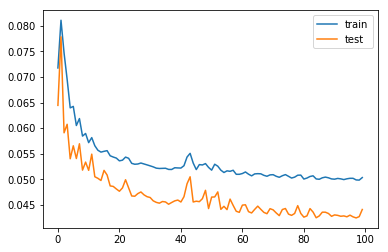

In [201]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [202]:
ypredict = model.predict(test_X)

In [409]:
# inverse transform
def inv_normalization(y):
    # deep copy!! or value of y will be changed!!
    inv_y = y.copy()
    result = y.copy()
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = inv_y[:, i]
        temp = np.ones((len(y), 5))
        temp[:, 0] = y_
        inv_ = scaler.inverse_transform(temp)
        result[:, i] = inv_[:, 0]
    print(y)
    return result

In [ ]:
# invert scaling for forecast
pm25_predict = inv_normalization(ypredict)
# invert scaling for actual
test_y = test_y.reshape(len(test_y), predict_hours)
pm25_actual = inv_normalization(test_y)

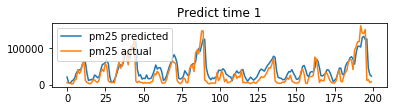

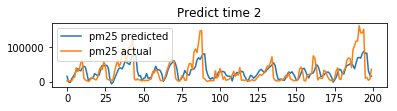

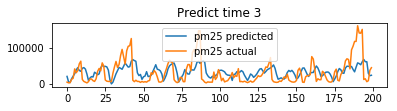

In [207]:
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i + 1))
    plt.show()

In [146]:
pm25_predict.shape

(500, 3)

In [142]:
ypredict

array([[0.07403421, 0.07887576, 0.07690275],
       [0.08376514, 0.08284387, 0.07804673],
       [0.08684049, 0.07959783, 0.07127094],
       ...,
       [0.06440486, 0.08039207, 0.0601436 ],
       [0.03982145, 0.05470458, 0.04826782],
       [0.0314076 , 0.04594938, 0.04680354]], dtype=float32)

## 2. consider future meteorology

In [410]:
values = raw_data.values
# ensure all data is float
values = values.astype('float32')
# normalize features (2668, 5)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 1
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, lag_hours, predict_hours)
reframed.head()

,var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
8,0.153046,0.198574,0.374091,0.558573,0.512661,0.251114,0.406248,0.425272,0.554446,0.568088,...,0.711738,0.236545,0.407403,0.510952,0.448421,0.260030,0.215540,0.400253,0.498948,0.482873
9,0.251114,0.406248,0.425272,0.554446,0.568088,0.381872,0.288658,0.438171,0.595190,0.566712,...,0.260030,0.215540,0.400253,0.498948,0.482873,0.172363,0.382836,0.424458,0.520143,0.496511
10,0.381872,0.288658,0.438171,0.595190,0.566712,0.450223,0.208508,0.395717,0.575162,0.477570,...,0.172363,0.382836,0.424458,0.520143,0.496511,0.350669,0.294288,0.428579,0.522122,0.540633
11,0.450223,0.208508,0.395717,0.575162,0.477570,0.285290,0.196451,0.368931,0.571786,0.475716,...,0.350669,0.294288,0.428579,0.522122,0.540633,0.368499,0.235787,0.380047,0.556551,0.449139
12,0.285290,0.196451,0.368931,0.571786,0.475716,0.307578,0.440446,0.433496,0.505700,0.512421,...,0.368499,0.235787,0.380047,0.556551,0.449139,0.010401,0.201930,0.309111,0.534773,0.440087


In [411]:
# split into train and test sets
values = reframed.values
# Use data of one year as training set
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
# split into input and outputs
train_X, train_y = train[:, :lag_hours * n_features], train[:, -n_features]
test_X, test_y = test[:, :lag_hours * n_features], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], lag_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 40) 1000 (1000,)
(1000, 8, 5) (1000,) (500, 8, 5) (500,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

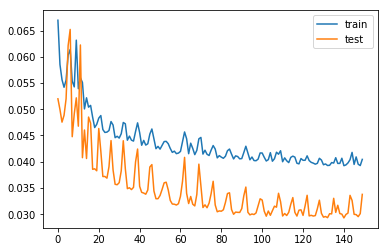

In [413]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [414]:
ypredict1 = model.predict(test_X)

In [415]:
test_X_1 = test_X[1:]
# 往前推一步，并填上气象场
test_X_1[:, 7, 0] = ypredict1[:-1, 0]
ypredict2 = model.predict(test_X_1)

In [416]:
test_X_2 = test_X_1[1:]
# 再往前推一步，并填上气象场
test_X_2[:, 7, 0] = ypredict2[:-1, 0]
ypredict3 = model.predict(test_X_2)

In [ ]:
test_y_2 = test_y[1:]
test_y_3 = test_y_2[1:]
test_y

In [ ]:
pm25_predict_1 = inv_normalization(ypredict1)
# invert scaling for forecast
pm25_predict_2 = inv_normalization(ypredict2)
# invert scaling for actual
test_y_2 = test_y_2.reshape(len(test_y_2), predict_hours)
pm25_actual_2 = inv_normalization(test_y_2)
# inv_normalization(test_y_2)

In [ ]:
# invert scaling for forecast
pm25_predict_3 = inv_normalization(ypredict3)
# invert scaling for actual
test_y_3 = test_y_3.reshape(len(test_y_3), predict_hours)
pm25_actual_3 = inv_normalization(test_y_3)

In [347]:
pm25_actual_3.shape

(498, 1)

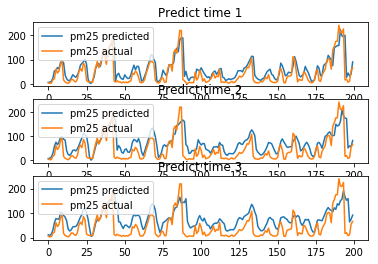

In [424]:
# for i in range(predict_hours):
plt.subplot(3, 1, 1)
plt.plot(pm25_predict_1[-200:, 0], '-', label = 'pm25 predicted')
plt.plot(pm25_actual[-200:, 0], '-', label = 'pm25 actual')
plt.legend()
plt.title('Predict time 1')
plt.subplot(3, 1, 2)
plt.plot(pm25_predict_2[-200:, 0], '-', label = 'pm25 predicted')
plt.plot(pm25_actual_2[-200:, 0], '-', label = 'pm25 actual')
plt.legend()
plt.title('Predict time 2')
plt.subplot(3, 1, 3)
plt.plot(pm25_predict_3[-200:, 0], '-', label = 'pm25 predicted')
plt.plot(pm25_actual_3[-200:, 0], '-', label = 'pm25 actual')
plt.legend()
plt.title('Predict time 3')
plt.show()

In [404]:
# inverse transform
def inv_normalization(y):
    inv_y = y.copy()
    result = y.copy()
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = inv_y[:, i]
        temp = np.ones((len(y), 5))
        temp[:, 0] = y_
        print(y)
        inv_ = scaler.inverse_transform(temp)
        print(y)
        result[:, i] = inv_[:, 0]
    print(y)
    return result